In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [2]:
#Read the given csv file
df = pd.read_csv("../Air Passengers/AirPassengers.csv")

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [6]:
#Convert the date into from DataFrame to DateTime
from datetime import datetime
con = df['Month']
df['Month'] = pd.to_datetime(df['Month']) #Use month column as our index
df.set_index('Month', inplace=True)
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [7]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


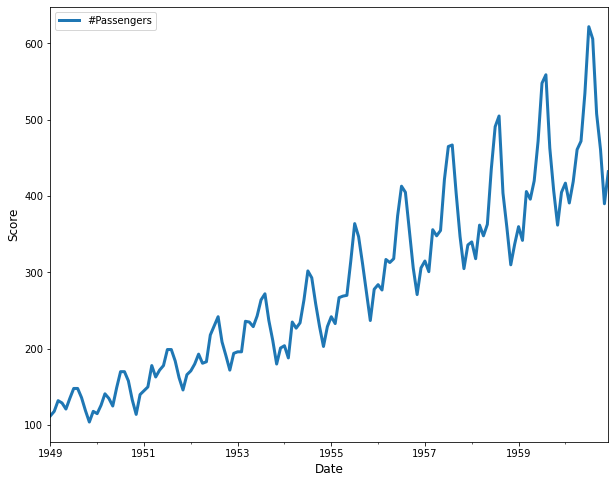

In [8]:
#Visualizing the time series
df.plot(figsize=(10,8), linewidth=3, fontsize=10)
plt.xlabel('Date', fontsize=12); # ; to suppress the Matplotlib output
plt.ylabel('Score', fontsize=12);

Text(0.5, 0.98, 'Additive Decompose')

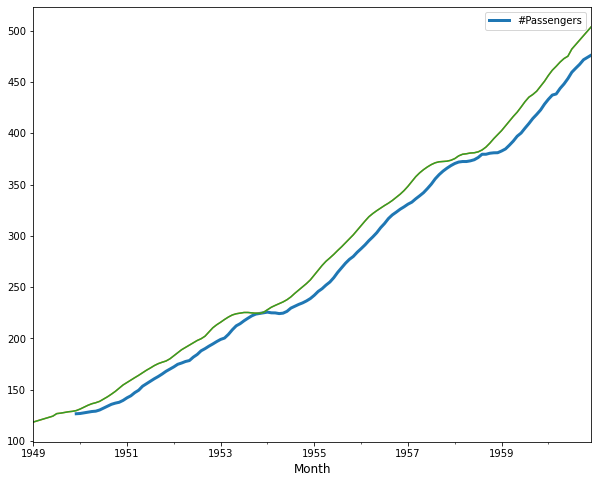

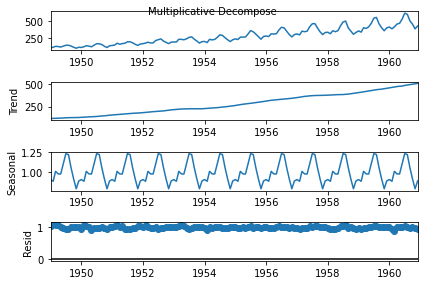

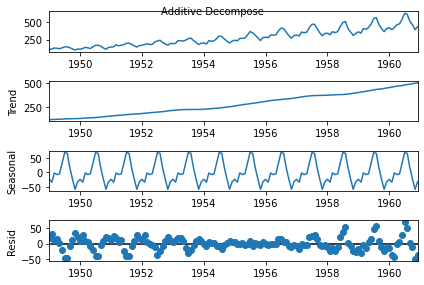

In [9]:
#Identifying the trends in Time Series
#Mean For top 1 
passenger = df[['#Passengers']]
passenger.rolling(12).mean().plot(figsize=(10,8), linewidth=3, fontsize=10) #We take yearly 12 months
plt.xlabel('Year', fontsize = 12)

from statsmodels.tsa.seasonal import seasonal_decompose #inform forecasting model on the problem

#Multiplicative Time Series : Value = Base Level x Trend x Seasonality x Error(Noise)
#The seasonal_decompose() function returns a result object. 
#The result object contains arrays to access four pieces of data from the decomposition

'''Multiplicative Decomposition 
(A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time)
A nonlinear trend is a curved line.
'''
decompose_result_mult = seasonal_decompose(passenger, model="multiplicative", extrapolate_trend='freq') 
trend = decompose_result_mult.trend
trend.plot();


'''Additive Decomposition 
(An additive model is linear where changes over time are consistently made by the same amount)
A linear trend is a straight line.
'''
decompose_result_add = seasonal_decompose(passenger, model="additive", extrapolate_trend='freq') #To extrapolate
trend1 = decompose_result_mult.trend
trend1.plot();

#plt.rcParams.update({'figure.figsize': (10,10)})
decompose_result_mult.plot().suptitle('Multiplicative Decompose', fontsize=10)
decompose_result_add.plot().suptitle('Additive Decompose', fontsize=10)


# To make Forecasting in Time Series Analysis

In [10]:
#Check the DataType
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [11]:
#Change from DataFrame to Series
ts = df['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [12]:
ts['1949-01-01 '] #Year,Month,Day (Specific day)

112

In [13]:
la = ts['1949-01-01 ' : '1949-05-01 '] #Get range

In [14]:
ts[:'1949-10-01 ']#Using Slicing Method

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

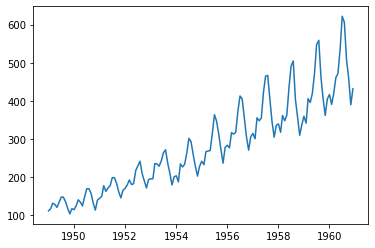

In [15]:
# To make sure the Time Series is Stationary
plt.plot(ts)

This shows overall increase in trend with some Seasonality

In [16]:
#Import Dicky Fuller to test Stationarity 
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determine the rolling values of the timeseries 
    rolmean = timeseries.rolling(12).mean() #We take value for 12 months
    rolstd = timeseries.rolling(12).std()
    
    #Plotting rolling statistics
    plt.plot(timeseries, color = 'blue', label = 'original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dicky Fuller Test (To have test statistics < Critical value)
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

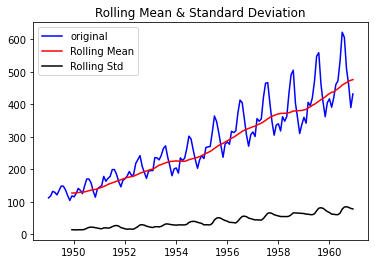

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [17]:
test_stationarity(ts)

Test stat > critical value.
Hence It is not stationary

In [18]:
#Making the Time Series Stationary

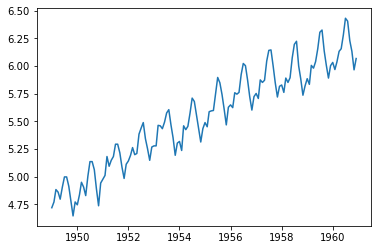

In [19]:
#Trend
ts_log = np.log(ts)
plt.plot(ts_log)

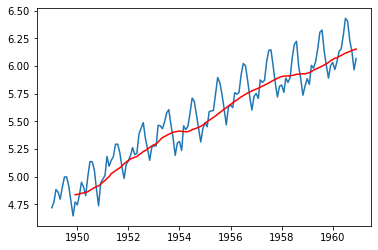

In [20]:
#Test with moving average
moving_avg = ts_log.rolling(12).mean() #To smoothen the instances
#moving_avg = pd.Series(ts_log).rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color = 'red')

In [21]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)
#we take the average of first 12 so 11 values are null

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

In [22]:
#Drop the NAN values
ts_log_moving_avg_diff.dropna(inplace = True)
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

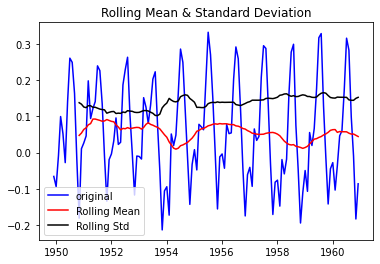

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [23]:
test_stationarity(ts_log_moving_avg_diff)

The test statistics is smaller than the 5 % critical values. That tells us that we are 95% confident that this series is stationary.

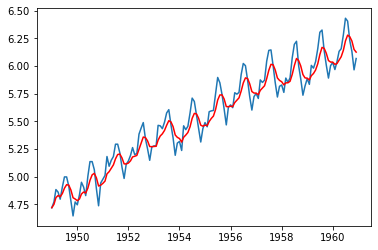

In [24]:
#Find explonential weighted moving average
expwigted_avg = ts_log.ewm(halflife=2).mean()
plt.plot(ts_log)
plt.plot(expwigted_avg, color = 'red')


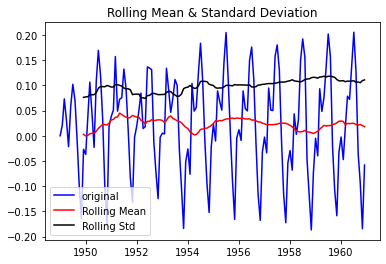

Results of Dickey-Fuller Test:
Test Statistic                  -3.087696
p-value                          0.027477
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [25]:
ts_log_ewma_diff = ts_log - expwigted_avg
test_stationarity(ts_log_ewma_diff)

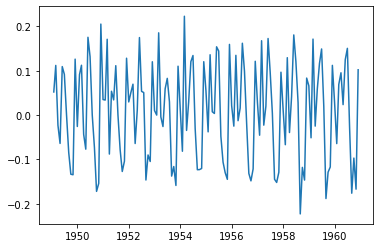

In [26]:
#Take first difference
ts_log_diff = ts_log- ts_log.shift()
plt.plot(ts_log_diff)

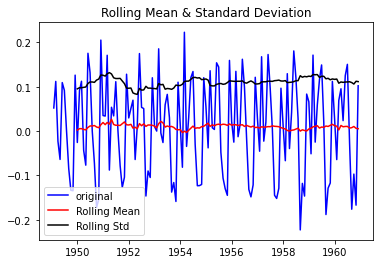

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [27]:
ts_log_diff.dropna(inplace = True)
test_stationarity(ts_log_diff)

Test statistic is less than 10% of the critical values, so we can be 90 % confident that this is stationary.

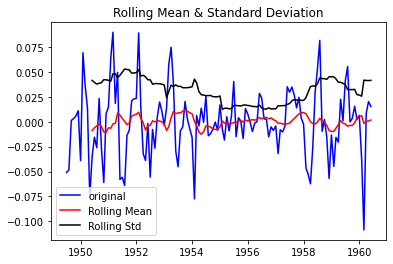

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [28]:
decomposition = seasonal_decompose(ts_log) 
residual  = decomposition.resid
ts_log_decompose = residual
ts_log_decompose.dropna(inplace = True)
test_stationarity(ts_log_decompose)

-Test statistic is lower than 1% critical values.

-The mean and std variations have small variations with time.

In [30]:
#Forecasting Time Series
#ARIMA to forecast the data where there are dependencies in the values.
from statsmodels.tsa.arima_model import ARIMA #Auto Regressive Intergrated Moving Average
from statsmodels.tsa.stattools import acf, pacf
#autocorrelation function (ACF), partial autocorrelation (PACF) 

lag_acf = acf(ts_log_diff, nlags=2)
lag_pacf = pacf(ts_log_diff, nlags = 20, method = 'ols') #Ordinary least squares (OLS)

/home/lauvindra/anaconda3/envs/lau/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


/home/lauvindra/anaconda3/envs/lau/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/lauvindra/anaconda3/envs/lau/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information w

Text(0.5, 1.0, 'RSS: 1.5023')

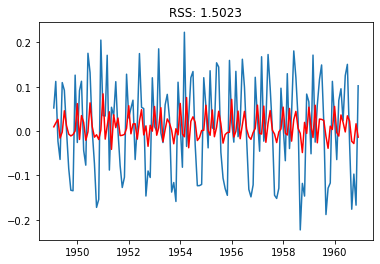

In [31]:
#We Use ARIMA Model to forecast
#AR Model
model = ARIMA(ts_log, order = (2, 1, 0))
results_AR = model.fit(disp = -1)

plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues-ts_log_diff)**2) ) #sum of the square of the errors (rss)

/home/lauvindra/anaconda3/envs/lau/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/lauvindra/anaconda3/envs/lau/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 1.4721')

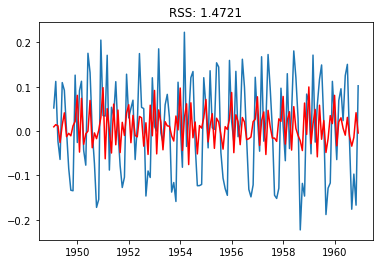

In [33]:
#MA Model

model = ARIMA(ts_log, order = (0, 1, 2))
results_MA = model.fit(disp = -1)
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color = 'red')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues-ts_log_diff)**2) )

/home/lauvindra/anaconda3/envs/lau/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/lauvindra/anaconda3/envs/lau/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 1.0292')

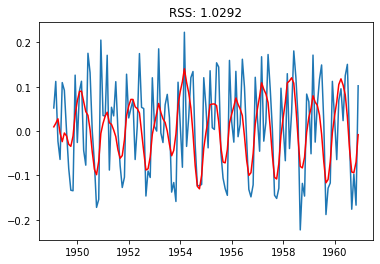

In [34]:
#ARIMA Model
model = ARIMA(ts_log, order = (2, 1, 2))
results_ARIMA = model.fit(disp = -1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-ts_log_diff)**2) )

RSS values:

• AR=1.5023

• MA=1.472

• ARIMA =1.0292

ARIMA has the best RSS values.

FINAL STEP: BRINGING THIS BACK TO THE ORIGINAL SCALE

In [36]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [37]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [38]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index = ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value = 0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Text(0.5, 1.0, 'RMSE: 90.1047')

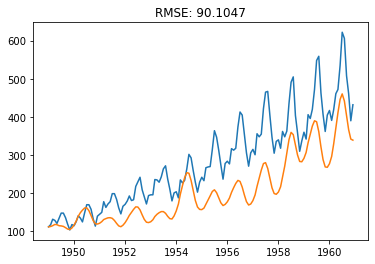

In [39]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA - ts )**2)/len(ts)))